
## Proyecto 04 - Series de Tiempo
Punto de Partida: Proyecto 3: Series de Tiempo
Profile: https://github.com/thomybm

Repositorio: https://github.com/thomybm/P3_Series_de_Tiempo

Dataset: Flujo Vehicular por Unidades de Peaje AUSA: datos de la autopista Illia, pago en Efectivo.
Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar - al menos para comenzar - los años 2017, 2018, 2019 y 2020.

1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import mean_squared_error
import statsmodels.tsa as tsa
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
from fbprophet import Prophet

sns.set()

Importing plotly failed. Interactive plots will not work.


In [2]:
data_2019 = pd.read_csv('Datasets_P4/flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('Datasets_P4/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('Datasets_P4/flujo-vehicular-2017.csv',  sep =',')

*Información adicional: Dataset Flujo Vehicular por Unidades de Peaje AUSA año 2020*

In [3]:
data_2020 = pd.read_csv('Datasets_P4/flujo-vehicular-2020.csv', sep =',')

In [4]:
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847933 entries, 0 to 1847932
Data columns (total 13 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   periodo         int64 
 1   fecha           object
 2   mes             object
 3   dia             object
 4   dia_fecha       int64 
 5   hora_inicio     int64 
 6   hora_fin        int64 
 7   estacion        object
 8   tipo_vehiculo   object
 9   forma_pago      object
 10  observacion     object
 11  sentido         object
 12  cantidad_pasos  int64 
dtypes: int64(5), object(8)
memory usage: 183.3+ MB


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Centro,24
1,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80
2,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1
3,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1
4,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1


Investigamos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [5]:
print(data_2020['estacion'].unique())
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [6]:
print(data_2020['sentido'].unique())
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [7]:
print(data_2020['tipo_vehiculo'].unique())
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago Doble Auto'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago doble Moto'
 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes'
 'Pesados 6 Ejes']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [8]:
print(data_2020['forma_pago'].unique())
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


**Consideraciones**

*1- TelePASE es un sistema de Telepeaje que permite pasar por los peajes sin detenerse y sin utilizar efectivo, abonando mensualmente los consumos.* (Funciona mediante un único dispositivo llamado TAG, el mismo consiste en una oblea electrónica con un chip incorporado que se adhiere al parabrisas del vehículo.)

*2- Con respecto a los años anteriores obsevamos que hay variación en :*

    a)Estaciones de Peaje
    b)Formas de Pago
    c)Tipo de Vehículos

*3-El personal de salud y el de seguridad que cumplen tareas esenciales durante la Pandemia por el COVID-19 seguirán teniendo su carril exclusivo y continuarán exentos del pago de peaje. Forma de Pago: EXENTO*

**Afirmamos que los años 2017, 2018,2019 y 2020 tienen las siguientes columnas con la siguiente información:**

**periodo:** año del dataset

**fecha:** año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia:** dia de la semana

**estacion:** estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido:** Centro o Provincia

**tipo_vehiculo:** Liviano o Pesado

**forma_pago:** Hay varias y varian entre los años.

**cantidad_pasos:** Cantidad de vehiculos

Trabajaremos con la estación **Illia** y la forma de pago **Efectivo**.

In [9]:
#Unimos los 3 datasets
dataset = pd.concat([data_2019, data_2018, data_2017])
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]
#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


Graficamos nuestros datos

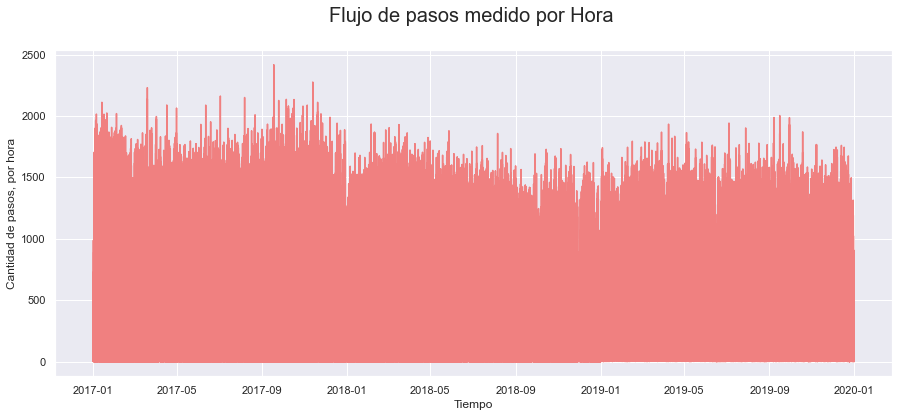

In [10]:
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos,color='lightcoral')
plt.title("Flujo de pasos medido por Hora \n", fontsize= 20)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos, por hora')
plt.show()

Resampleamos nuestros datos para agrupar por dia, buscando una mejor visualización

In [11]:
diario = dataset.resample('D', on = 'fecha').sum()

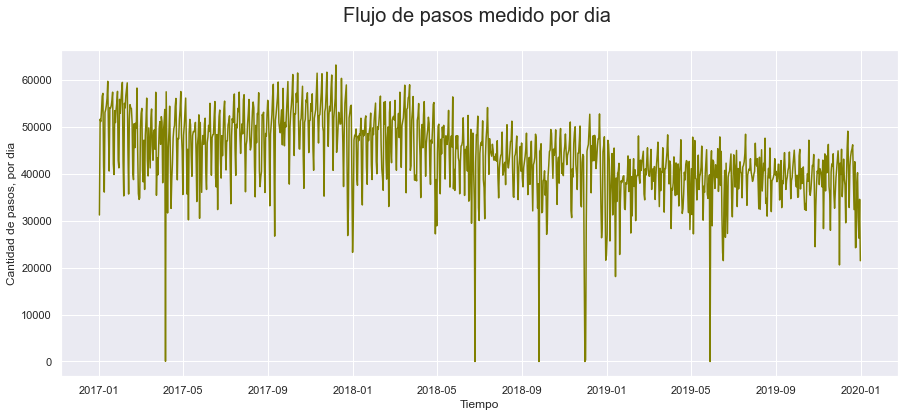

In [12]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos,color='olive')
plt.title("Flujo de pasos medido por dia \n", fontsize= 20)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos, por dia')
plt.show()

**Observaciones:**

- Gracias al Proyecto 3, donde trabajamos con estos datos, sabemos que no hay valores faltantes.
- En cuanto a los valores atípicos (picos negativos), reemplazaremos los valores atípicos mediante la interpolación.

Detectamos los valores atipicos y realizamos la interpolacion.

In [13]:
diario.cantidad_pasos[diario.cantidad_pasos <=10000] = np.nan
print(diario.isna().sum())

diario = diario.interpolate(method='nearest', k=4)
print(diario.isna().sum())

cantidad_pasos    6
dtype: int64
cantidad_pasos    0
dtype: int64


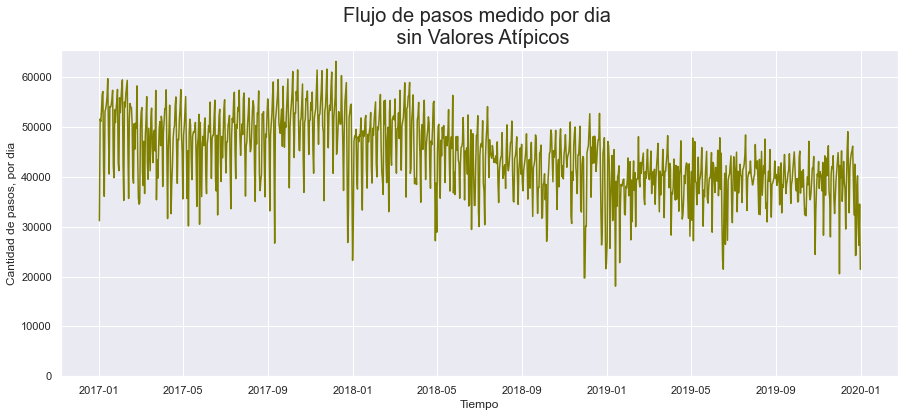

In [14]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos,color='olive')
plt.title("Flujo de pasos medido por dia \n sin Valores Atípicos", fontsize= 20)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos, por dia')
plt.ylim(ymin=0)
plt.show()

**Observaciones:**

- Gracias al Proyecto 3, donde trabajamos con estos datos, sabemos que no hay valores faltantes.
- En cuanto a los valores atípicos (picos negativos), reemplazaremos los valores atípicos mediante la interpolación.

Trabajaremos al igual que en el Proyecto 3 con la media semanal y con semanas enteras

In [15]:
semanal_m =diario.resample('W').mean()#Resampleamos a Semanal Media
semanal_m=semanal_m[(semanal_m.index >='2017-01-08')&(semanal_m.index <='2019-12-29')]#Trabajaremos con semnas enteras
print(semanal_m.shape)
semanal_m

(156, 1)


,cantidad_pasos
fecha,
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571
2017-02-05,51343.000000
...,...
2019-12-01,38079.285714
2019-12-08,40413.000000
2019-12-15,38994.285714


## Analizamos el año 2020

In [16]:
dataset_2020 =data_2020[data_2020.estacion=='ILLIA']
dataset_2020.describe(include='all')

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
count,215490.0,215490,215490,215490,215490.000000,215490.000000,215490.000000,215490,215490,215490,215490,215490,215490.000000
unique,NaN,274,9,7,NaN,NaN,NaN,1,12,7,20,2,NaN
top,NaN,2020-02-21 00:00:00,enero,Miércoles,NaN,NaN,NaN,ILLIA,Auto,Tag,Tag - PosPago,Centro,NaN
freq,NaN,1212,31057,34244,NaN,NaN,NaN,215490,96220,98368,47502,111629,NaN
mean,2020.0,NaN,NaN,NaN,15.606307,12.145858,12.397202,NaN,NaN,NaN,NaN,NaN,58.485948
std,0.0,NaN,NaN,NaN,8.770295,6.230917,6.322939,NaN,NaN,NaN,NaN,NaN,182.367450
min,2020.0,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2020.0,NaN,NaN,NaN,8.000000,7.000000,8.000000,NaN,NaN,NaN,NaN,NaN,1.000000
50%,2020.0,NaN,NaN,NaN,16.000000,12.000000,13.000000,NaN,NaN,NaN,NaN,NaN,4.000000
75%,2020.0,NaN,NaN,NaN,23.000000,17.000000,18.000000,NaN,NaN,NaN,NaN,NaN,20.000000


In [17]:
dataset_2020['forma_pago'].value_counts()#Sobre la estacion Illia

Tag                  98368
Efectivo             39072
Violación            27524
Rec.Deuda            21803
Exento               18098
Tarjeta Magnética     7712
CPP                   2913
Name: forma_pago, dtype: int64

In [18]:
data_2020['forma_pago'].value_counts() #Todas las estaciones

Tag                  1045096
Violación             312230
Efectivo              196304
Rec.Deuda             130578
Exento                110340
Tarjeta Magnética      36006
CPP                    17379
Name: forma_pago, dtype: int64

*Al comparar las formas de pago en el año 2020, vemos que la forma de pago en EFECTIVO disminuyó drásticamente y que la mayoría de los usuarios optaron por la forma de pago con Tag (TELEPASE). Se debe a las polìticas aplicadas en las autopistas por AUSA de descuentos de hasta 20% por pago con Telepase. A partir del 28/09/2020 el uso de Telepase es obligatorio en las autopistas que dependen de AUSA, siendo el costo del peaje un 55% menor que si se abona en Efectivo.*

In [19]:
d_2020=data_2020[(data_2020.estacion=='ILLIA')& (data_2020.forma_pago == 'Efectivo')]
d_2020

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
52,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ILLIA,Auto,Efectivo,Efectivo,Centro,326
53,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ILLIA,Auto,Efectivo,Efectivo,Provincia,319
134,2020,2020-01-01 00:00:00,enero,Miércoles,1,1,2,ILLIA,Auto,Efectivo,Efectivo,Centro,199
135,2020,2020-01-01 00:00:00,enero,Miércoles,1,1,2,ILLIA,Auto,Efectivo,Efectivo,Provincia,180
202,2020,2020-01-01 00:00:00,enero,Miércoles,1,2,3,ILLIA,Auto,Efectivo,Efectivo,Centro,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847017,2020,2020-09-29,septiembre,Martes,29,15,16,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,1
1847412,2020,2020-09-30,septiembre,Miércoles,30,8,9,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,1
1847475,2020,2020-09-30,septiembre,Miércoles,30,10,11,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Centro,1
1847506,2020,2020-09-30,septiembre,Miércoles,30,11,12,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,2


In [20]:
#Quitamos las columnas que no utilizaremos
d_2020.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
d_2020['fecha2'] = pd.to_datetime(d_2020.fecha) + pd.to_timedelta(d_2020.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
d_2020.drop(columns=['fecha','hora_fin','dia_fecha'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
d_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el d_2020 por fecha
d_2020.sort_values('fecha', inplace = True)
d_2020.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, buscando una mejor visualización
da_2020 = d_2020.resample('D', on = 'fecha').sum()
da_2020

,cantidad_pasos
fecha,
2020-01-01,21395
2020-01-02,33722
2020-01-03,37067
2020-01-04,30627
2020-01-05,27812
...,...
2020-09-26,5474
2020-09-27,3987
2020-09-28,5379


**Inspeccionando si hay valores faltantes**

In [21]:
da_2020.isnull (). sum ()

cantidad_pasos    0
dtype: int64

*No hay valores faltantes.*
### Analizando las formas de pago: Efectivo y Telepase
1. En la Autopista ILLIA las diferentes formas de pago evaluadas (Efectivo y Telepase): antes y durante la cuarentena

*Forma de Pago Efectivo* (al igual que con los datos anteriores, trabajamos con semanal media):

In [22]:
semanal_20_m =da_2020.resample('W').mean()
print(semanal_20_m.shape)
semanal_20_m

(40, 1)


,cantidad_pasos
fecha,
2020-01-05,30124.600000
2020-01-12,34765.571429
2020-01-19,35259.714286
2020-01-26,34456.000000
2020-02-02,36190.714286
2020-02-09,35306.428571
2020-02-16,37351.142857
2020-02-23,36728.000000
2020-03-01,33641.000000


Creamos el dataset de Telepase (Tag)

In [23]:
d_2020_t=data_2020[(data_2020.estacion=='ILLIA')& (data_2020.forma_pago == 'Tag')]
d_2020_t

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
62,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ILLIA,Auto,Tag,Tag - PosPago,Centro,205
63,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ILLIA,Auto,Tag,Tag - PosPago,Provincia,141
64,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ILLIA,Auto,Tag,Tag - PosPago OCR,Centro,22
65,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ILLIA,Auto,Tag,Tag - PosPago OCR,Provincia,131
66,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ILLIA,Auto,Tag,Tag - PrePago,Centro,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847639,2020,2020-09-30,septiembre,Miércoles,30,15,16,ILLIA,Pesados 6 Ejes,Tag,Tag - PosPago,Provincia,2
1847671,2020,2020-09-30,septiembre,Miércoles,30,16,17,ILLIA,Pesados 6 Ejes,Tag,Tag - PosPago,Centro,2
1847672,2020,2020-09-30,septiembre,Miércoles,30,16,17,ILLIA,Pesados 6 Ejes,Tag,Tag - PosPago OCR,Centro,1
1847703,2020,2020-09-30,septiembre,Miércoles,30,17,18,ILLIA,Pesados 6 Ejes,Tag,Tag - PosPago,Centro,2


In [24]:
#Quitamos las columnas que no utilizaremos
d_2020_t.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
d_2020_t['fecha2'] = pd.to_datetime(d_2020_t.fecha) + pd.to_timedelta(d_2020_t.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
d_2020_t.drop(columns=['fecha','hora_fin','dia_fecha'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
d_2020_t.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el d_2020_t por fecha
d_2020_t.sort_values('fecha', inplace = True)
d_2020_t.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, buscando una mejor visualización
da_2020_t = d_2020_t.resample('D', on = 'fecha').sum()
semanal_20_t =da_2020_t.resample('W').mean()
print(semanal_20_t.shape)
semanal_20_t

(40, 1)


,cantidad_pasos
fecha,
2020-01-05,33239.600000
2020-01-12,45275.714286
2020-01-19,46034.857143
2020-01-26,45056.285714
2020-02-02,47610.142857
2020-02-09,48739.000000
2020-02-16,50148.142857
2020-02-23,50353.714286
2020-03-01,42120.142857


Visualizamos las tendencias:

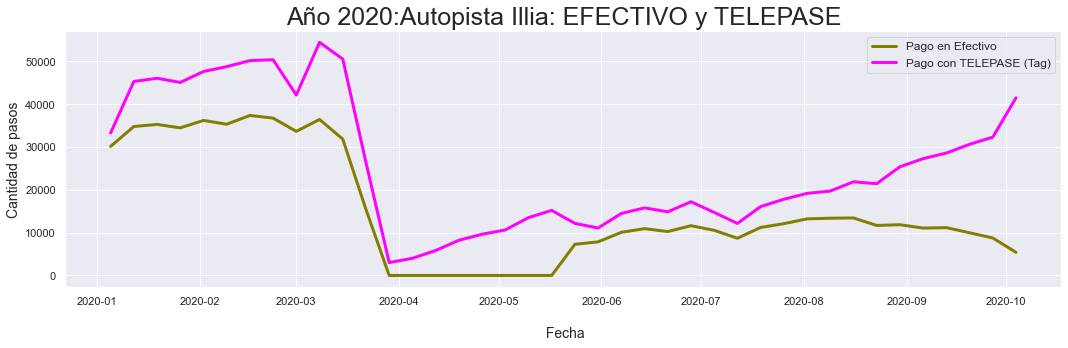

In [25]:
plt.figure(figsize=(15,5))
plt.plot(semanal_20_m.index, semanal_20_m.cantidad_pasos,lw=3,color='olive', label='Pago en Efectivo')
plt.plot(semanal_20_t.index, semanal_20_t.cantidad_pasos, lw=3, color='magenta',label='Pago con TELEPASE (Tag)')
plt.title ('Año 2020:Autopista Illia: EFECTIVO y TELEPASE', fontsize=25)
plt.xlabel('\n Fecha', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

**Conclusiones**

- Producto de la cuarentena que decretaron Argentina a partir del 20/03/2020 los pasos de vehículo con pago en efectivo se igualaron a cero. Recién el 17/05/2020 que se fueron habilitando algunas actividades.
- Algunas actividades fueron habilitadas a trabajar con permisos especiales, para mantener el abastecimiento y caos del pais durante la cuarentena
- Dadas las politicas implementadas por el Gobierno de la Ciudad y AUSA, estimularon la forma de pago con  telepase (Tag ya). Tanto por la velocidad como previniendo el contacto entre personas.
   
**2-Comparamos Estacion Illia con Avellaneda: las dos formas de pago**

Creamos el dataset de AVELLANEDA forma de pago Efectivo

In [26]:
d_2020_a=data_2020[(data_2020.estacion=='AVELLANEDA')& (data_2020.forma_pago == 'Efectivo')]
d_2020_a

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
11,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,AVELLANEDA,Auto,Efectivo,Efectivo,Centro,542
12,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,AVELLANEDA,Auto,Efectivo,Efectivo,Provincia,596
100,2020,2020-01-01 00:00:00,enero,Miércoles,1,1,2,AVELLANEDA,Auto,Efectivo,Efectivo,Centro,255
101,2020,2020-01-01 00:00:00,enero,Miércoles,1,1,2,AVELLANEDA,Auto,Efectivo,Efectivo,Provincia,373
170,2020,2020-01-01 00:00:00,enero,Miércoles,1,2,3,AVELLANEDA,Auto,Efectivo,Efectivo,Centro,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847432,2020,2020-09-30,septiembre,Miércoles,30,9,10,AVELLANEDA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,1
1847531,2020,2020-09-30,septiembre,Miércoles,30,12,13,AVELLANEDA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,1
1847562,2020,2020-09-30,septiembre,Miércoles,30,13,14,AVELLANEDA,Pesados 6 Ejes,Efectivo,Efectivo,Centro,1
1847593,2020,2020-09-30,septiembre,Miércoles,30,14,15,AVELLANEDA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,1


In [27]:
#Quitamos las columnas que no utilizaremos
d_2020_a.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
d_2020_a['fecha2'] = pd.to_datetime(d_2020_a.fecha) + pd.to_timedelta(d_2020_a.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
d_2020_a.drop(columns=['fecha','hora_fin','dia_fecha'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
d_2020_a.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el d_2020_a por fecha
d_2020_a.sort_values('fecha', inplace = True)
d_2020_a.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, buscando una mejor visualización
da_2020_a = d_2020_a.resample('D', on = 'fecha').sum()
semanal_20_a =da_2020_a.resample('W').mean()
print(semanal_20_a.shape)
semanal_20_a

(40, 1)


,cantidad_pasos
fecha,
2020-01-05,52176.400000
2020-01-12,57942.285714
2020-01-19,58302.714286
2020-01-26,57321.285714
2020-02-02,58811.285714
2020-02-09,58217.142857
2020-02-16,61756.714286
2020-02-23,60179.428571
2020-03-01,55185.428571


Creamos el dataset de AVELLANEDA forma de pago Telepase (Tag)

In [28]:
d_2020_at=data_2020[(data_2020.estacion=='AVELLANEDA')& (data_2020.forma_pago == 'Tag')]
d_2020_at

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
21,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,AVELLANEDA,Auto,Tag,Tag - PosPago,Centro,361
22,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,AVELLANEDA,Auto,Tag,Tag - PosPago,Provincia,248
23,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,AVELLANEDA,Auto,Tag,Tag - PosPago OCR,Centro,55
24,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,AVELLANEDA,Auto,Tag,Tag - PosPago OCR,Provincia,194
25,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,AVELLANEDA,Auto,Tag,Tag - PrePago,Centro,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847831,2020,2020-09-30,septiembre,Miércoles,30,22,23,AVELLANEDA,Pesados 6 Ejes,Tag,Tag - PosPago OCR,Provincia,1
1847851,2020,2020-09-30,septiembre,Miércoles,30,23,0,AVELLANEDA,Pesados 6 Ejes,Tag,Tag - PosPago,Centro,14
1847852,2020,2020-09-30,septiembre,Miércoles,30,23,0,AVELLANEDA,Pesados 6 Ejes,Tag,Tag - PosPago,Provincia,14
1847853,2020,2020-09-30,septiembre,Miércoles,30,23,0,AVELLANEDA,Pesados 6 Ejes,Tag,Tag - PosPago OCR,Centro,2


In [29]:
#Quitamos las columnas que no utilizaremos
d_2020_at.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
d_2020_at['fecha2'] = pd.to_datetime(d_2020_at.fecha) + pd.to_timedelta(d_2020_at.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
d_2020_at.drop(columns=['fecha','hora_fin','dia_fecha'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
d_2020_at.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el d_2020_at por fecha
d_2020_at.sort_values('fecha', inplace = True)
d_2020_at.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, buscando una mejor visualización
da_2020_at = d_2020_at.resample('D', on = 'fecha').sum()
semanal_20_at =da_2020_at.resample('W').mean()
print(semanal_20_at.shape)
semanal_20_at

(40, 1)


,cantidad_pasos
fecha,
2020-01-05,50648.200000
2020-01-12,63220.571429
2020-01-19,63689.000000
2020-01-26,63745.142857
2020-02-02,65039.285714
2020-02-09,65366.571429
2020-02-16,67030.714286
2020-02-23,66352.714286
2020-03-01,57778.714286


Visualizamos las tendencias:

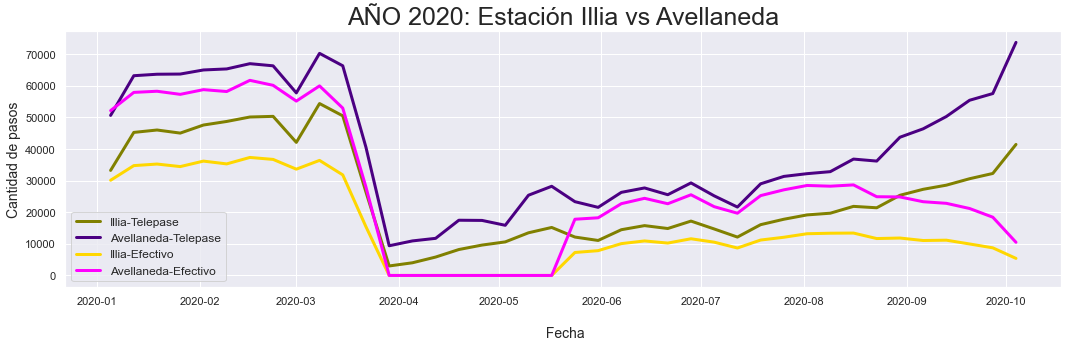

In [30]:
plt.figure(figsize=(15,5))
plt.plot(semanal_20_t.index, semanal_20_t.cantidad_pasos,lw=3,color='olive', label='Illia-Telepase')
plt.plot(semanal_20_at.index, semanal_20_at.cantidad_pasos, lw=3, color='indigo',label='Avellaneda-Telepase')
plt.plot(semanal_20_m.index, semanal_20_m.cantidad_pasos,lw=3,color='gold', label='Illia-Efectivo')
plt.plot(semanal_20_a.index, semanal_20_a.cantidad_pasos, lw=3, color='magenta',label='Avellaneda-Efectivo')

plt.title ('AÑO 2020: Estación Illia vs Avellaneda', fontsize=25)
plt.xlabel('\n Fecha', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

*Claramente observamos que en las estaciones de Peaje, el comportamiento fue similar. Disminuye de pago en Efectivo, con el aumento de pago con Telepase (Tag).*

## Concatenamos los Datasets

In [31]:
diario_2020= pd.concat([diario, da_2020])
diario_2020

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0
...,...
2020-09-26,5474.0
2020-09-27,3987.0
2020-09-28,5379.0


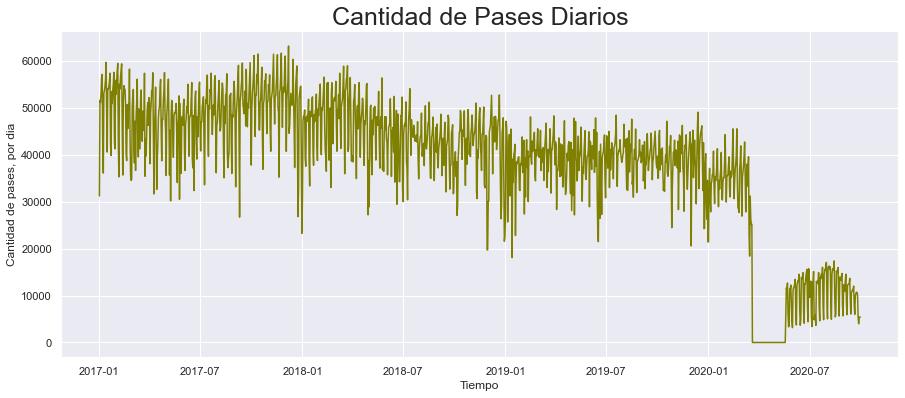

In [32]:
plt.figure(figsize = (15,6))
plt.plot(diario_2020.index, diario_2020.cantidad_pasos,color='olive')
plt.title("Cantidad de Pases Diarios", fontsize= 25)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pases, por dia')
plt.show()

**Visualización de lo ya expuesto:**

- Pases con forma de pago en efectivo igual a 0 (cero) durante las semanas del 21/03/2020, que se estableció el ASPO (Aislamiento Social Preventivo Obligatorio) y la habilitación de algunas actividades. También la migración hacia la forma de pago "Telepase.

In [33]:
semanal_m_20 =diario_2020.resample('W').mean()
print(semanal_m_20.shape)
semanal_m_20

(197, 1)


,cantidad_pasos
fecha,
2017-01-01,31183.000000
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571
...,...
2020-09-06,11058.428571
2020-09-13,11162.428571
2020-09-20,9964.142857


*(Tomamos siempre semanas completas)*

In [34]:
semanal_m_20=semanal_m_20[(semanal_m_20.index >='2017-01-08')&(semanal_m_20.index <='2020-09-27')]
semanal_m_20

,cantidad_pasos
fecha,
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571
2017-02-05,51343.000000
...,...
2020-08-30,11842.571429
2020-09-06,11058.428571
2020-09-13,11162.428571


## Arima
**La métrica de Evaluacion elegida es RMSE dado el manejo de los valores atípicos que se ha realizado en el preprocesamiento de datos**

**En el Proyecto 3: SARIMAX One-Step fue el modelo elegido para predecir el 2020**

Uno de los métodos más comunes utilizados en la predicción de series de tiempo se conoce como el modelo ARIMA, que significa Autoreg Ressive Integrado Moving Average. Es un modelo que se puede ajustar a datos de series de tiempo para comprender o predecir mejor los puntos futuros de la serie.

- Uno de los métodos disponibles en Python para modelar y predecir puntos futuros de una serie de tiempo se conoce como SARIMAX , que significa promedios móviles integrados autorregresivos estacionales con regresores eXógenos .

In [35]:
warnings.filterwarnings('ignore')

In [36]:
semanal_m=semanal_m[(semanal_m.index >='2017-01-08')&(semanal_m.index <='2019-12-29')]
y=semanal_m
y

,cantidad_pasos
fecha,
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571
2017-02-05,51343.000000
...,...
2019-12-01,38079.285714
2019-12-08,40413.000000
2019-12-15,38994.285714


In [37]:
semanal_2020_m=semanal_20_m[(semanal_20_m.index >='2020-01-05')&(semanal_20_m.index <='2020-03-15')]
y_2020=semanal_2020_m
y_2020

,cantidad_pasos
fecha,
2020-01-05,30124.600000
2020-01-12,34765.571429
2020-01-19,35259.714286
2020-01-26,34456.000000
2020-02-02,36190.714286
2020-02-09,35306.428571
2020-02-16,37351.142857
2020-02-23,36728.000000
2020-03-01,33641.000000


In [38]:
y_2020['2020':]

,cantidad_pasos
fecha,
2020-01-05,30124.600000
2020-01-12,34765.571429
2020-01-19,35259.714286
2020-01-26,34456.000000
2020-02-02,36190.714286
2020-02-09,35306.428571
2020-02-16,37351.142857
2020-02-23,36728.000000
2020-03-01,33641.000000


*Del Año 2020 hasta el 20/03/2020, ya que ahi comienza la cuarentena.*

In [39]:
d=range(0,3)
p=q=range(8,13)
pdq=list(itertools.product (p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12)
              for x in list(itertools.product (p,d,q)) ]
print('Ejemplos de combinaciones de parametros para SARIMAX ....')
print('SARIMAX:{} x{}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x{}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{} x{}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{} x{}'.format(pdq[2],seasonal_pdq[4]))

Ejemplos de combinaciones de parametros para SARIMAX ....
SARIMAX:(8, 0, 9) x(8, 0, 9, 12)
SARIMAX:(8, 0, 9) x(8, 0, 10, 12)
SARIMAX:(8, 0, 10) x(8, 0, 11, 12)
SARIMAX:(8, 0, 10) x(8, 0, 12, 12)


In [40]:
y= semanal_m.cantidad_pasos
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(10, 1, 8),
                                seasonal_order=(10, 1, 8, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4086     17.001     -0.024      0.981     -33.730      32.913
ar.L2         -0.4350     52.529     -0.008      0.993    -103.390     102.520
ar.L3         -0.1900     70.640     -0.003      0.998    -138.642     138.262
ar.L4         -0.3753     19.489     -0.019      0.985     -38.573      37.823
ar.L5          0.3739     52.784      0.007      0.994    -103.080     103.828
ar.L6         -0.3398     44.074     -0.008      0.994     -86.723      86.044
ar.L7         -0.4820     61.749     -0.008      0.994    -121.508     120.544
ar.L8          0.1621    148.870      0.001      0.999    -291.617     291.941
ar.L9          0.4892     77.639      0.006      0.995    -151.681     152.660
ar.L10        -0.2884     37.593     -0.008      0.994     -73.970      73.393
ma.L1         -0.2287     28.407     -0.008      0.9

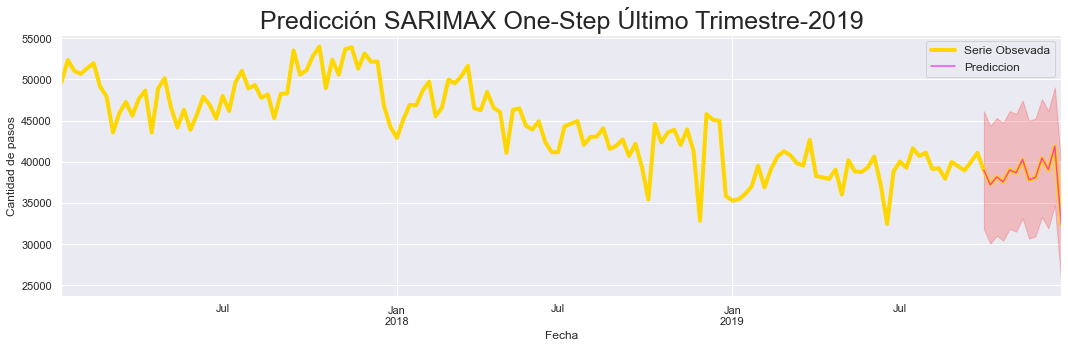

In [41]:
pred = results.get_prediction(start=datetime.datetime(2019,10,6), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='Serie Obsevada',color='gold',lw = 4,figsize=(15,5))

pred.predicted_mean.plot(ax=ax, label='Prediccion', alpha=.7, color='magenta')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.2)
plt.title("Predicción SARIMAX One-Step Último Trimestre-2019", fontsize=25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de pasos')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [42]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-10-06':]


rmse_so = np.sqrt(mean_squared_error(y_truth,y_forecasted ))
print(f'RMSE de SARIMAX One-Step es: {rmse_so }')

RMSE de SARIMAX One-Step es: 35.04717731285507


*La predicción con SARIMAX tanto One-Step, como Multi-Step fueron muy buenas, los RSME que arrojan son mut buenos. Por lo tanto SARIMAX One-Step fue el modelo elegido para predecir el 2020.*

## Año 2020
**Producción y visualización pronósticos**
- Aprovechamos nuestro modelo de serie temporal ARIMA estacional para pronosticar valores futuros. El get_forecast(), atributo de nuestro objeto de serie temporal puede calcular valores pronosticados para un número específico de pasos adelante. Podemos usar la salida de este código para trazar la serie de tiempo y los pronósticos de sus valores futuros.

Una serie de tiempo es una secuencia de valores ordenados en el tiempo.  Una de las funciones más buscadas a la hora de trabajar con ella es la posibilidad de predecir el futuro.  Por lo que estamos asumiendo un supuesto muy importante: **que el futuro se va a comportar como el pasado**, pero el futuro es incierto (siempre vamos a tener un componente de sorpresa). **El coronavirus y la cuarentena fue ese elemento sorpresa** esta vez. Además, le podemos sumas la **obligación en el uso de Telepase**. 

Por lo que las predicciones hechas con los datos del 2017 al 2019 tienen sentido compararlas, desde mi punto de vista hasta marzo 2020, especìficamente hasta el 15/03/2020, si tomamos semanas completas. La obligatoriedad en el uso de Telepase, y las políticas aplicadas son claro indicador de que los usuarios migrarán hacia la forma de pago con Telepase (así lo hemos comprobado). Podemos decir que el comportamiento de los usuarios despues de marzo 2020, no será el mismo. El "Telepase" será la forma de pago habitual. *Para poder evaluar en forma objetiva el desempeño del Modelo elegido, se predecirá y evaluará hasta el 15/03/2020, siendo esta la ultima semana completa decretada el ASPO.*

*Graficamos desde el 2017*

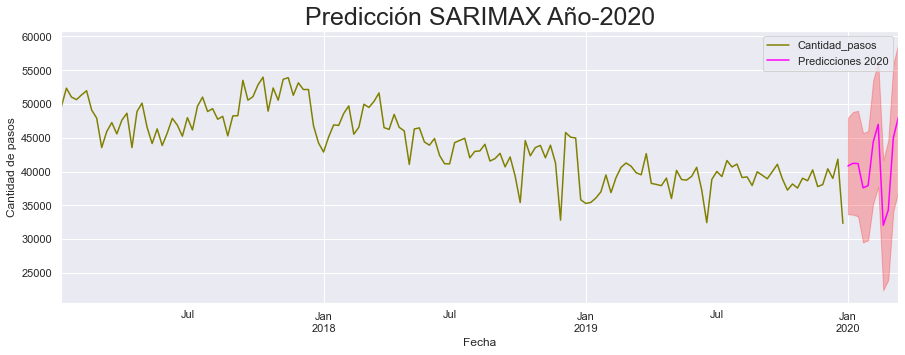

In [43]:
pred_uc = results.get_forecast(steps=datetime.datetime(2020,3,15))
pred_ci = pred_uc.conf_int()

ax = y.plot(label='Cantidad_pasos', color='olive',figsize=(15,5))
pred_uc.predicted_mean.plot(ax=ax, label='Predicciones 2020', color='magenta')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.25)
plt.title("Predicción SARIMAX Año-2020", fontsize=25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de pasos')

plt.legend()
plt.show()

*Graficamos desde el último trimestre del 2019*

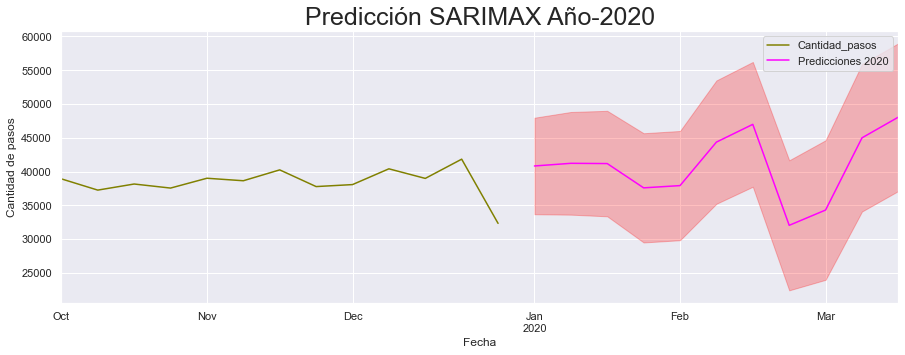

In [44]:
pred_uc = results.get_forecast(steps=datetime.datetime(2020,3,15))
pred_ci = pred_uc.conf_int()

ax = y.plot(label='Cantidad_pasos', color='olive',figsize=(15,5))
pred_uc.predicted_mean.plot(ax=ax, label='Predicciones 2020', color='magenta')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.25)
plt.title("Predicción SARIMAX Año-2020", fontsize=25)
plt.xlim(datetime.datetime(2019,10,6), datetime.datetime(2020,3,15))
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de pasos')

plt.legend()
plt.show()

Las interrupciones en el gráfico que se observan se debe a que se tomamoss semanas enteras, la ultima semana del año 2019 y la primera del año 2020 son semanas cortadas por el "año calendario".
## Modelo Benchmark
Nuestro Modelo Benchmark es la prediccion que hizo Sarimax hasta el 15/03/2020

*Prediccion Sarimax*

In [45]:
y_s_2020=pred_uc.predicted_mean
# 1º trimestre 2020 del 05/01/2020 al 15/03/2020 antes que empiece la cuarentena. Datos AUSA
fecha_i='2020-01-05'
fecha_f='2020-03-15'
y_2020=semanal_2020_m[(semanal_2020_m.index >=fecha_i)&(semanal_2020_m.index <=fecha_f)]

b_rmse=np.sqrt(mean_squared_error(y_2020, y_s_2020))

---------------------------------
RMSE en Benchmark: 8196.30810406308
---------------------------------


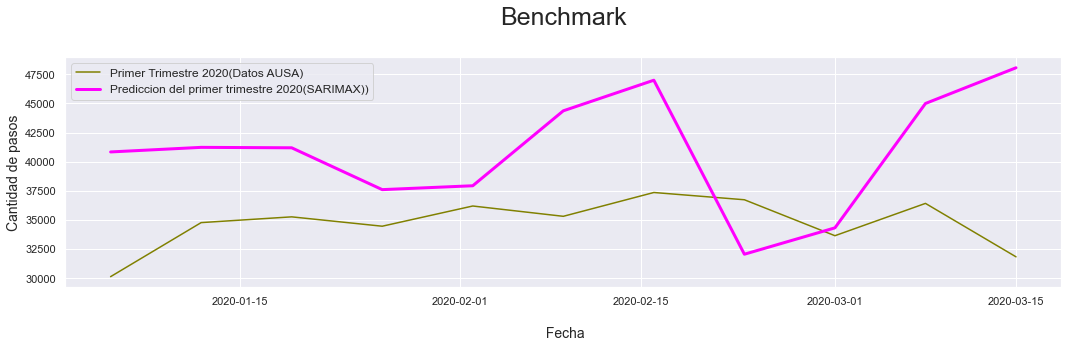

In [46]:
print('---------------------------------')
print(f'RMSE en Benchmark: {b_rmse}')
print('---------------------------------')

plt.figure(figsize=(15,5))
plt.plot(y_2020.index, y_2020.cantidad_pasos,color='olive', label='Primer Trimestre 2020(Datos AUSA)')
plt.plot(y_s_2020.index, y_s_2020, lw=3, color='magenta',label='Prediccion del primer trimestre 2020(SARIMAX))')
plt.title ('Benchmark\n', fontsize=25)
plt.xlabel('\n Fecha', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

*Podemos Observar que la Prediccion de Sarimax para el primer trimestre 2020, no es tan buena como la que realizó para el último Trimestre 2019. Quizá se debió a que la migración a Telepase fue más rápida de lo que se predecía, dados los beneficios que esta forma de pago ofrecía (descuento y rapidez).*

**Probaremos un nuevo Modelo de Machine Learning, Prophet, y confrontaremos los resultados**
## Prophet:
**Prophet es un software de código abierto lanzado por el equipo Core Data Science de Facebook**

Prophet es un procedimiento para pronosticar datos de series de tiempo basado en un modelo aditivo donde las tendencias no lineales se ajustan a la estacionalidad anual, semanal y diaria, más los efectos de las vacaciones. Prophet es robusto ante los datos faltantes y los cambios de tendencia, y normalmente maneja bien los valores atípicos. Funciona mejor con series de tiempo que tienen fuertes efectos estacionales y varias temporadas de datos históricos.

*Condición para trabajar con Prophet:* La entrada a Prophet es siempre un marco de datos con dos columnas: ds e y. La ds columna (marca de fecha) debe tener el formato esperado por Pandas, idealmente AAAA-MM-DD para una fecha o AAAA-MM-DD HH: MM: SS para una marca de tiempo. La y columna debe ser numérica y representa la medida que deseamos pronosticar. Por esta razón renombramos las columnas:

In [47]:
semanal_m_1 = semanal_m.copy()
semanal_m_1.reset_index(level=0, inplace=True)
semanal_m_1= semanal_m_1.rename(columns={'fecha': 'ds',
                        'cantidad_pasos': 'y'})
semanal_m_1.head()

,ds,y
0,2017-01-08,49601.714286
1,2017-01-15,52344.714286
2,2017-01-22,51030.714286
3,2017-01-29,50654.428571
4,2017-02-05,51343.000000


In [48]:
semanal_m_1.tail()

,ds,y
151,2019-12-01,38079.285714
152,2019-12-08,40413.000000
153,2019-12-15,38994.285714
154,2019-12-22,41840.142857
155,2019-12-29,32341.428571


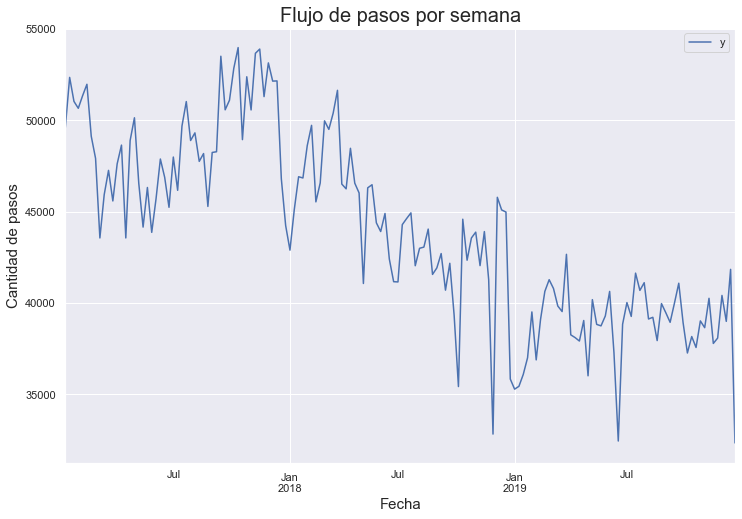

In [49]:
ax = semanal_m_1.set_index('ds').plot(figsize=(12, 8))
plt.title("Flujo de pasos por semana", fontsize= 20)
ax.set_ylabel('Cantidad de pasos', fontsize= 15 )
ax.set_xlabel('Fecha', fontsize= 15 )

plt.show()

In [50]:
prophet_model = Prophet(interval_width= 0.95 )
prophet_model.fit(semanal_m_1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Creamos el DataFrame partir del modelo entrenado con la cantidad total de fechas a predecir: hasta el 15/03/2020: 11 semanas (porque la frecuencia es semanal).

In [51]:
future_dates = prophet_model.make_future_dataframe(periods=11, freq='W')
future_dates.head()

,ds
0,2017-01-08
1,2017-01-15
2,2017-01-22
3,2017-01-29
4,2017-02-05


In [52]:
future_dates = prophet_model.make_future_dataframe(periods=11, freq='W')
future_dates.tail()

,ds
162,2020-02-16
163,2020-02-23
164,2020-03-01
165,2020-03-08
166,2020-03-15


El Modelo asignará a cada fila future un valor predicho que nombra **yhat**.

In [53]:
forecast = prophet_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-01-08,45848.144996,41465.682071,50513.254019
1,2017-01-15,46806.784927,42119.990594,51221.415801
2,2017-01-22,48693.265933,43908.961231,53350.910376
3,2017-01-29,49998.125637,45494.590976,54190.370568
4,2017-02-05,50091.160418,45391.544605,54536.492264


In [54]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
162,2020-02-16,36012.643617,31788.510304,40526.644881
163,2020-02-23,35658.426110,31372.869173,40139.143604
164,2020-03-01,35823.594237,31009.855246,39865.340328
165,2020-03-08,36207.197215,31546.822940,40642.997740
166,2020-03-15,36457.923350,32318.805852,40839.018657


Los valores predichos (yhat) por el modelo para las fechas observadas (ds) de los años trabajados

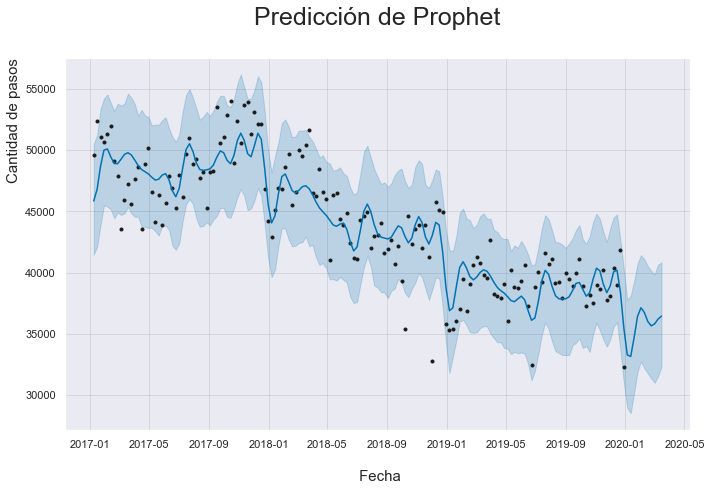

In [55]:
fig1 = prophet_model.plot(forecast)
plt.title("Predicción de Prophet\n", fontsize=25)
plt.xlabel('\n Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', loc= 'top', fontsize=15)
plt.show()

- Los puntos negros que indican los puntos de datos utilizados para entrenar el modelo.
- La línea traza la predicción.
- La función traza los intervalos de incertidumbre.

## Contrastando los Modelos con la Serie Observada (AUSA)
#### Año 2019

In [56]:
prophet_2019_p = forecast[(forecast.ds >= "2019-10-06") & (forecast.ds <= "2019-12-29")]
prophet_2019_p.drop(columns=["trend", "yhat_lower", "yhat_upper",
                       "trend_lower", "trend_upper", "additive_terms",
                       "additive_terms_lower", "additive_terms_upper",
                       "yearly", "yearly_lower", "yearly_upper", 
                       "multiplicative_terms", "multiplicative_terms_lower", 
                       "multiplicative_terms_upper"], inplace= True)
prophet_2019_p.rename(columns={'ds':'fecha', "yhat":'cantidad_pasos'}, inplace=True)
prophet_2019_p = prophet_2019_p.set_index('fecha')
prophet_2019_p

,cantidad_pasos
fecha,
2019-10-06,38628.475148
2019-10-13,38080.868847
2019-10-20,38370.699632
2019-10-27,39466.864574
2019-11-03,40364.849999
2019-11-10,40141.946505
2019-11-17,39057.073332
2019-11-24,38362.916713
2019-12-01,38909.580179


In [57]:
y_o_2019=semanal_m[(semanal_m.index >='2019-10-06')&(semanal_m.index <='2019-12-29')]
y_o_2019

,cantidad_pasos
fecha,
2019-10-06,38926.142857
2019-10-13,37262.857143
2019-10-20,38163.857143
2019-10-27,37564.285714
2019-11-03,39018.428571
2019-11-10,38648.000000
2019-11-17,40255.714286
2019-11-24,37785.714286
2019-12-01,38079.285714


In [58]:
pred = results.get_prediction(start=datetime.datetime(2019,10,6), dynamic=False)
sarimax_2019_p= pred.predicted_mean
sarimax_2019_p = pd.DataFrame(sarimax_2019_p)

sarimax_2019_p.rename(columns={"predicted_mean":'cantidad_pasos'}, inplace=True)


sarimax_2019_p = sarimax_2019_p.set_index(sarimax_2019_p.index)

sarimax_2019_p

,cantidad_pasos
fecha,
2019-10-06,38984.541224
2019-10-13,37197.429147
2019-10-20,38169.886045
2019-10-27,37556.706253
2019-11-03,39007.151561
2019-11-10,38650.180433
2019-11-17,40290.325739
2019-11-24,37810.106638
2019-12-01,38098.878956


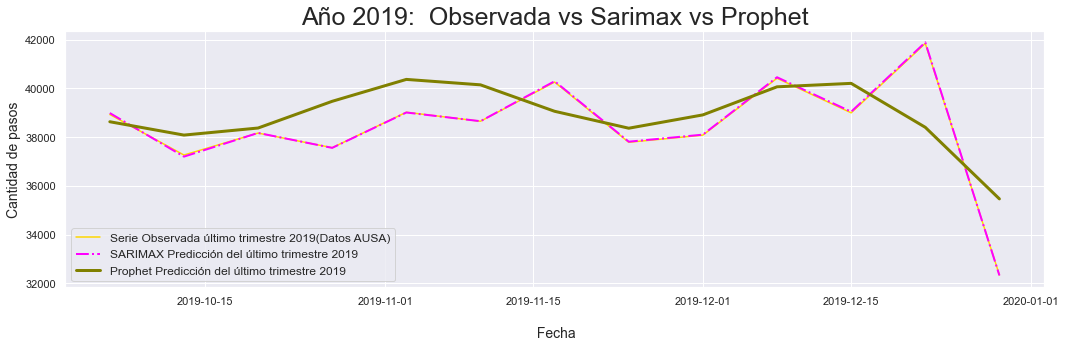

RMSE de PROPHET  es: 1619.2909038704902
RMSE de SARIMAX One-Step es: 35.04717731285507


In [59]:
plt.figure(figsize=(15,5))

plt.plot(y_o_2019.index, y_o_2019.cantidad_pasos,color='gold', label='Serie Observada último trimestre 2019(Datos AUSA)')
plt.plot(sarimax_2019_p.index, sarimax_2019_p.cantidad_pasos,'-.',lw=2, color='magenta',label='SARIMAX Predicción del último trimestre 2019')
plt.plot(prophet_2019_p.index, prophet_2019_p.cantidad_pasos, lw=3, color='olive',label='Prophet Predicción del último trimestre 2019')

plt.title ('Año 2019:  Observada vs Sarimax vs Prophet', fontsize=25)
plt.xlabel('\n Fecha', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

y_p_pro=  prophet_2019_p.cantidad_pasos
y= y_o_2019.cantidad_pasos
rmse_pro = np.sqrt(mean_squared_error(y,y_p_pro))

print(f'RMSE de PROPHET  es: {rmse_pro }')
print(f'RMSE de SARIMAX One-Step es: {rmse_so }')

*La prediccioón con SARIMAX One-Step para el ültimo Trimestre del 2019 es excelente.*

## Año 2020

In [60]:
prophet_2020_p =forecast[(forecast.ds >= "2020-01-05") & (forecast.ds <= "2020-03-15")]
prophet_2020_p.drop(columns=["trend", "yhat_lower", "yhat_upper",
                       "trend_lower", "trend_upper", "additive_terms",
                       "additive_terms_lower", "additive_terms_upper",
                       "yearly", "yearly_lower", "yearly_upper", 
                       "multiplicative_terms", "multiplicative_terms_lower", 
                       "multiplicative_terms_upper"], inplace= True)
prophet_2020_p.rename(columns={'ds':'fecha', "yhat":'cantidad_pasos'}, inplace=True)
prophet_2020_p = prophet_2020_p.set_index('fecha')
prophet_2020_p

,cantidad_pasos
fecha,
2020-01-05,33289.331794
2020-01-12,33161.885572
2020-01-19,34708.509938
2020-01-26,36437.716684
2020-02-02,37139.895857
2020-02-09,36744.344456
2020-02-16,36012.643617
2020-02-23,35658.426110
2020-03-01,35823.594237


*Prediccion Sarimax: Modelo Benchmark*

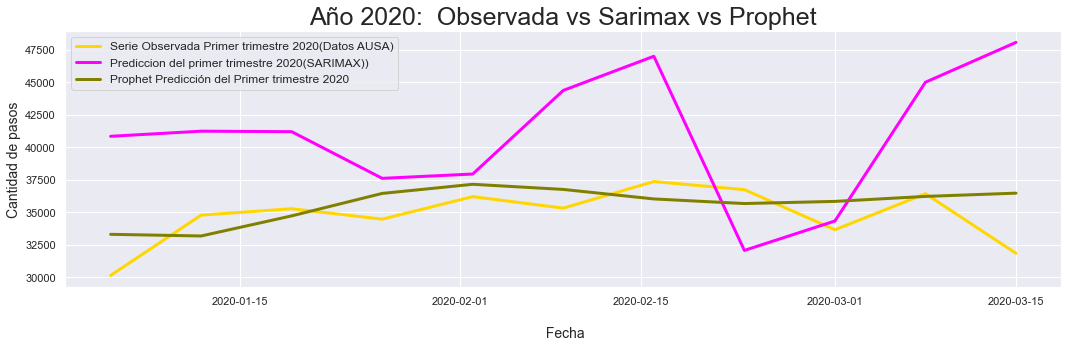

RMSE de PROPHET  es: 2109.9296642338836
RMSE en Benchmark (Sarimax One-Step): 8196.30810406308


In [61]:
y_s_2020=pred_uc.predicted_mean
# 1º trimestre 2020 del 05/01/2020 al 15/03/2020 antes que empiece la cuarentena. Datos AUSA
fecha_i='2020-01-05'
fecha_f='2020-03-15'
y_2020=semanal_2020_m[(semanal_2020_m.index >=fecha_i)&(semanal_2020_m.index <=fecha_f)]
plt.figure(figsize=(15,5))

plt.plot(y_2020.index, y_2020.cantidad_pasos,color='gold',lw=3, label='Serie Observada Primer trimestre 2020(Datos AUSA)')
plt.plot(y_s_2020.index, y_s_2020, lw=3, color='magenta',label='Prediccion del primer trimestre 2020(SARIMAX))')
plt.plot(prophet_2020_p.index, prophet_2020_p.cantidad_pasos,lw=3 , color='olive',label='Prophet Predicción del Primer trimestre 2020')

plt.title ('Año 2020:  Observada vs Sarimax vs Prophet', fontsize=25)
plt.xlabel('\n Fecha', fontsize=14)
plt.ylabel('Cantidad de pasos', fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

y_pro_p=  prophet_2020_p.cantidad_pasos
y= y_2020.cantidad_pasos
rmse_pro_20 = np.sqrt(mean_squared_error(y,y_pro_p))

print(f'RMSE de PROPHET  es: {rmse_pro_20 }')
print(f'RMSE en Benchmark (Sarimax One-Step): {b_rmse}')# Prediccion hecha con Sarimax

**El Modelo Prophet es el mejor modelo de ML que predijo el 2020**, ya que es su valor de RMSE es la cuarta parte del Benchmark, en este caso, la predicción que se hizo con Sarimax One-Step. Es probable que se deba a que Prophet es resistente a valores atípicos, datos faltantes y cambios drásticos en su serie temporal.
## Conclusiones
Este Proyecto requeririó la implementación de un nuevo Modelo de ML que no fue visto en clase. El desafío fue investigar, consultar y probar hasta lograr un resultado. Como aprendimos en la carrera, siempre nos encontraremos con cosas nuevas que podremos probar e implementar.

Con respecto al resultado obtenido, no tenía muchas esperanzas de mejorar los resultados del Proyecto 3, con SARIMAX, porque ya eran muy buenos. Pero todo se puede mejorar. Repitiedo lo que venimos diciendo: el futuro es incierto y podemos aproximarnos a lo que puede llegar a suceder, pero siempre vamos a tener sorpresas.

Me queda como desafío seguir estudiando y practicando para encontrar aún mejores resultados en este y otros ámbitos de aplicación.